## Loading the libraries

In [13]:
import numpy as np
import pandas as pd
import os

from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

In [1]:
# DATA PREPROCESSING

In [3]:
#Preprocessing Training Dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
training_set = train_datagen.flow_from_directory('D:/New folder/corona/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 244 images belonging to 2 classes.


In [7]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
test_set = test_datagen.flow_from_directory('D:/New folder/corona/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 20 images belonging to 2 classes.


## Creating CNN model


Initialising the CNN

In [14]:

# Initialising the CNN
model = Sequential()

# Step 1 - Convolution
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(128,128,3)))

# Step 2 - Pooling
model.add(MaxPool2D(2,2))

# Step 2 - Dropout
model.add(Dropout(0.4))


# Adding a second convolutional layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

# Adding a third convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full Connection
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

# Step 5 - Output Layer
## For Binary Classification
model.add(Dense(1, activation='sigmoid'))

In [20]:
# Part 3 - Training the CNN

# Compiling the CNN
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(learning_rate=0.00005),
                  metrics=['accuracy'])
print(model.summary())




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 256)      

In [21]:
batch_size = 256
epochs = 40

In [25]:
r = model.fit(training_set,validation_data=test_set,steps_per_epoch=len(training_set),
  validation_steps=len(test_set),epochs=epochs)

Epoch 1/40
8/8 [==============================] - 22s 2s/step - loss: 7.2466 - accuracy: 0.5451 - val_loss: 0.4568 - val_accuracy: 0.7500
Epoch 2/40
8/8 [==============================] - 16s 2s/step - loss: 1.3769 - accuracy: 0.6557 - val_loss: 0.4010 - val_accuracy: 1.0000
Epoch 3/40
8/8 [==============================] - 24s 3s/step - loss: 0.7489 - accuracy: 0.6598 - val_loss: 0.4698 - val_accuracy: 1.0000
Epoch 4/40
8/8 [==============================] - 30s 4s/step - loss: 0.5707 - accuracy: 0.7705 - val_loss: 0.5406 - val_accuracy: 0.9500
Epoch 5/40
8/8 [==============================] - 30s 4s/step - loss: 0.6371 - accuracy: 0.7090 - val_loss: 0.5530 - val_accuracy: 1.0000
Epoch 6/40
8/8 [==============================] - 19s 2s/step - loss: 0.5132 - accuracy: 0.7664 - val_loss: 0.4651 - val_accuracy: 0.9500
Epoch 7/40
8/8 [==============================] - 13s 2s/step - loss: 0.6606 - accuracy: 0.7500 - val_loss: 0.5766 - val_accuracy: 1.0000
Epoch 8/40
8/8 [==================

In [26]:
#plotting

In [27]:
import matplotlib.pyplot as plt

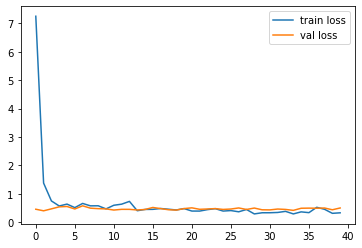

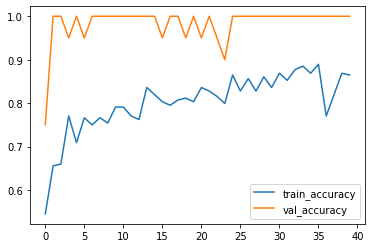

In [29]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train_accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model.save('classification_model.h5')

In [31]:
#loading model
model = load_model('D:/New folder/classification_model.h5')

In [34]:
test_image = image.load_img('D:/New folder/dataset/X-Ray Image DataSet/No_findings/00001280_004.png', target_size = (128,128))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [35]:
result

array([[0.38257754]], dtype=float32)

In [36]:
if result[0]<0.5:
    print("The person have corona")
else:
    print("The person don't have corona ")

The person have corona
